In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("global-power-plant.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Exploratory Data Analysis(EDA)

In [3]:
data.shape

(907, 27)

In [4]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

As we have seen that there are 12 columns which have object data type and there are 14 columns which have numerical data types.

In [6]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

A lot of data missing in the dataset. Let's check the uniqueness.

In [7]:
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Coloumns with zero(0) Values: other_fuel3, weep_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh, need to be deleted.

And columns with single unique values: country, country long, other_fuel2, year_of_capacity_data, generation_data_source, need to drop these columns as well, as these will not affect more.

# Dropping not relevant Columns

In [8]:
data.drop(columns=["country","country_long","generation_data_source","other_fuel2","name", "year_of_capacity_data","owner","generation_gwh_2013","other_fuel3","wepp_id","generation_gwh_2019","estimated_generation_gwh",],axis=1,inplace=True)


In [9]:
data.shape

(907, 15)

In [10]:
data.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

Huge data missing in other_fuel1 column, but it is important for analysis, for that will fill the missing values with imputation techniques.

In [11]:
data["other_fuel1"] = data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])

In [12]:
data["geolocation_source"] = data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])

In [13]:
data["longitude"] = data["longitude"].fillna(data["longitude"].median())
data["commissioning_year"] = data["commissioning_year"].fillna(data["commissioning_year"].median())

In [14]:
data["latitude"] = data["latitude"].fillna(data["latitude"].mean())

In [15]:
knnimp=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2014"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2014"]


In [16]:
data["generation_gwh_2014"]=knn_imp["generation_gwh_2014"]

In [17]:
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2015"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2015"]
data["generation_gwh_2015"]=knn_imp["generation_gwh_2015"]

#generation_gwh_2016
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2016"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2016"]
data["generation_gwh_2016"]=knn_imp["generation_gwh_2016"]

#generation_gwh_2017
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2017"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2017"]
data["generation_gwh_2017"]=knn_imp["generation_gwh_2017"]

#generation_gwh_2018
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2018"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2018"]
data["generation_gwh_2018"]=knn_imp["generation_gwh_2018"]


In [18]:
data.isnull().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now no null values are present in the dataset. Now we can move ahead.

<AxesSubplot:>

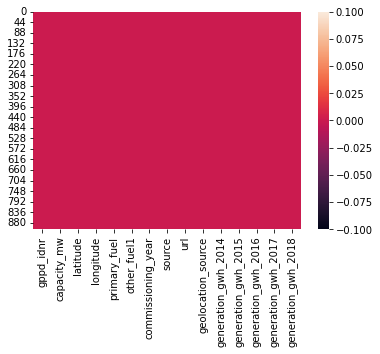

In [19]:
sns.heatmap(data.isnull())

In [20]:
data.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [21]:
#No we need to change the commisioning_year to age of power plant.
data['Powerplant_age']=2019-data['commissioning_year']
data.drop('commissioning_year',axis=1,inplace=True)
data.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


In [22]:
#Url is also not much relevant for model prediction so it can be removed as well from the dataset.
data.drop('url',axis=1,inplace=True)
data.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


In [23]:
data.shape

(907, 14)

# Statistical Description

In [24]:
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1216.741950,1225.073916,1247.908108,1294.299953,1348.291762,20.271224
std,590.085456,6.079148,4.815073,2944.274717,3119.361453,3138.569942,3187.953881,3293.148855,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,16.779017,13.293200,8.974900,22.244883,47.968950,16.000000
50%,59.200000,21.281800,76.719500,171.853083,139.546801,131.021600,128.822650,133.912800,18.000000
75%,385.250000,25.176450,79.206100,926.055500,735.113025,780.149650,817.977250,810.733240,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


Observations: 
1.No missing values present in the dataset as the count of the coulmns are equal.
2.Columns are skewed to right as Mean is more than the median(50%) in all the columns except latitude.
3.Median is greater than the mean in the column latitude which means it is skewed to left.
4.There are huge outliers present in most of the columns as difference between maximum and 75% percentile. Will remove them using appropriate methods before building our model.
5.Minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and SD.

In [25]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns : ",categorical_col)

Categorical columns :  ['gppd_idnr', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [26]:
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns : ",numerical_col)

Numerical columns :  ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']


# Data Visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


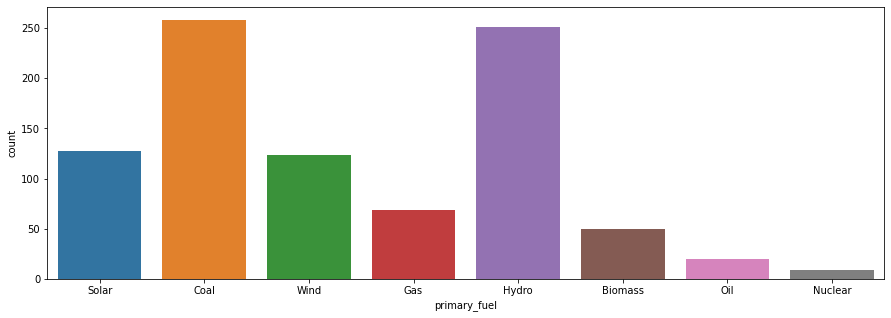

In [27]:
# Visualizing the types of fuel in primary_fuel
print(data["primary_fuel"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data["primary_fuel"])
plt.show()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


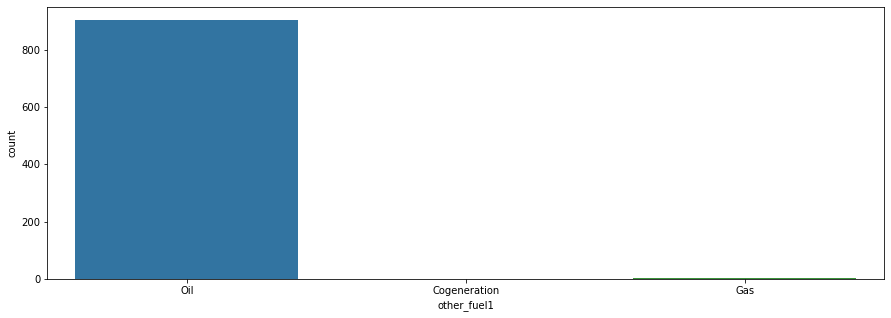

In [28]:
# Visualizing the counts of other fuel
print(data["other_fuel1"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data["other_fuel1"])
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


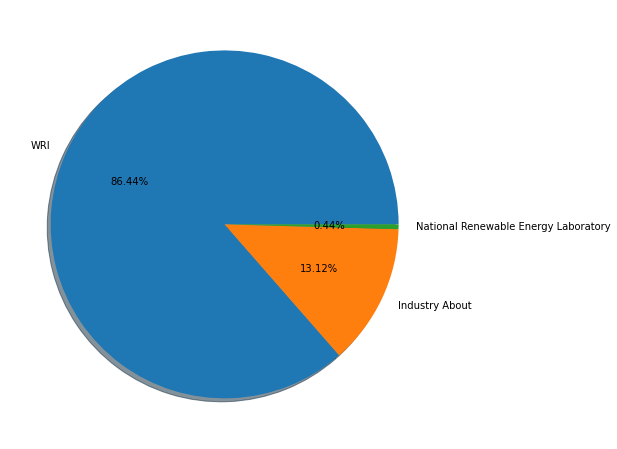

In [29]:
# Visualizing the counts of geolocation source

print(data["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

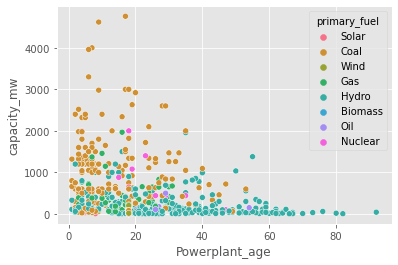

In [30]:
plt.style.use('ggplot')
sns.scatterplot(x = "Powerplant_age", y = "capacity_mw",hue='primary_fuel', data = data)
plt.show()

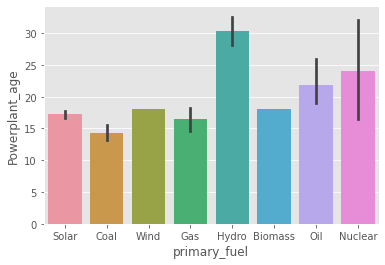

In [31]:
#Relation between fuel used and powerplant age
sns.barplot(x = "primary_fuel", y = "Powerplant_age", data = data)
plt.show()

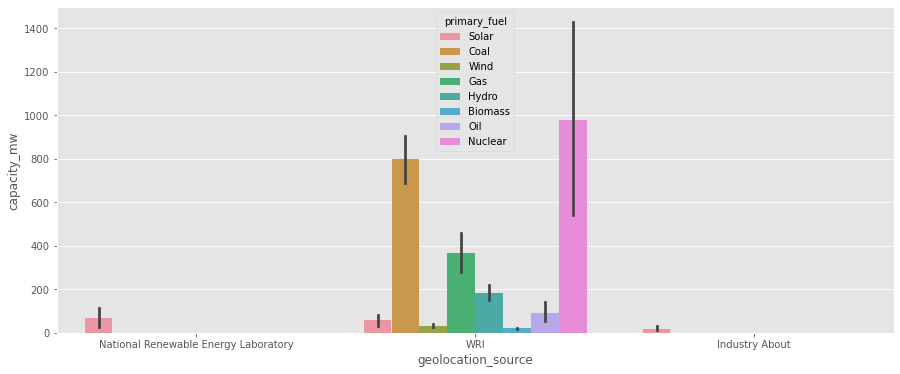

In [32]:
#Relation between source and capacity_mw

plt.figure(figsize = (15,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = data,hue='primary_fuel')
plt.show()

Capacity of geolocation source WRI is maximum as it's capacity more than 950 mega watts. The National Renewable Energy Laboratory and Industry About has less capacity. 

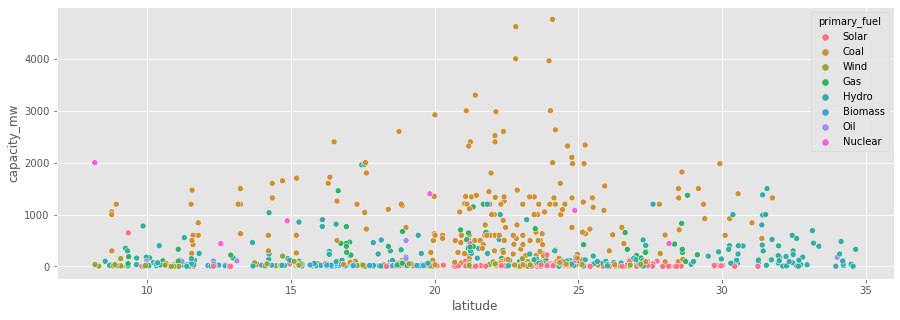

In [33]:
#Relation between Capacity and latitude  of the power plant.

plt.figure(figsize=[15,5])
plt.style.use('ggplot')
sns.scatterplot(data['latitude'],data["capacity_mw"],hue=data['primary_fuel']);

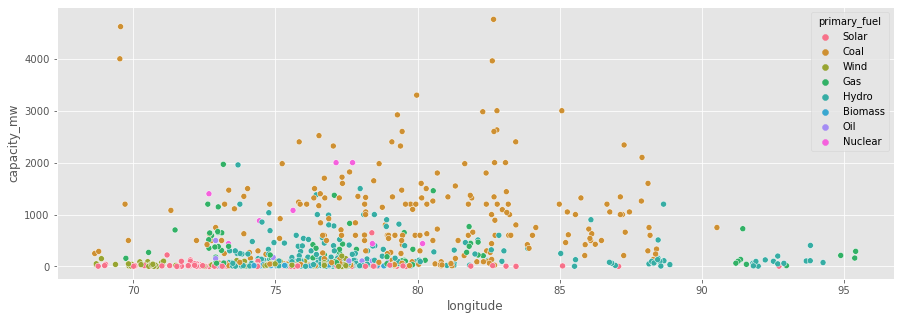

In [34]:
# Relation between longitude and the capacity of the power plant
plt.figure(figsize=[15,5])
plt.style.use('ggplot')

sns.scatterplot(data['longitude'],data["capacity_mw"],hue=data['primary_fuel']);

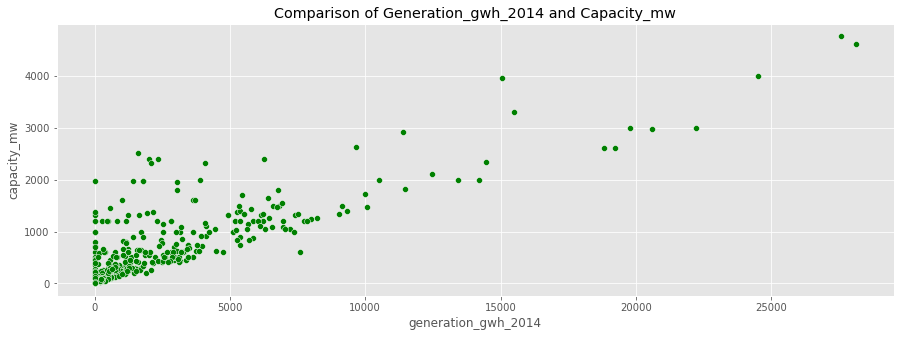

In [35]:
#capacity of the plant in generation_gwh_2014

plt.figure(figsize = (15,5))
plt.title("Comparison of Generation_gwh_2014 and Capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = data,color="g")
plt.show()

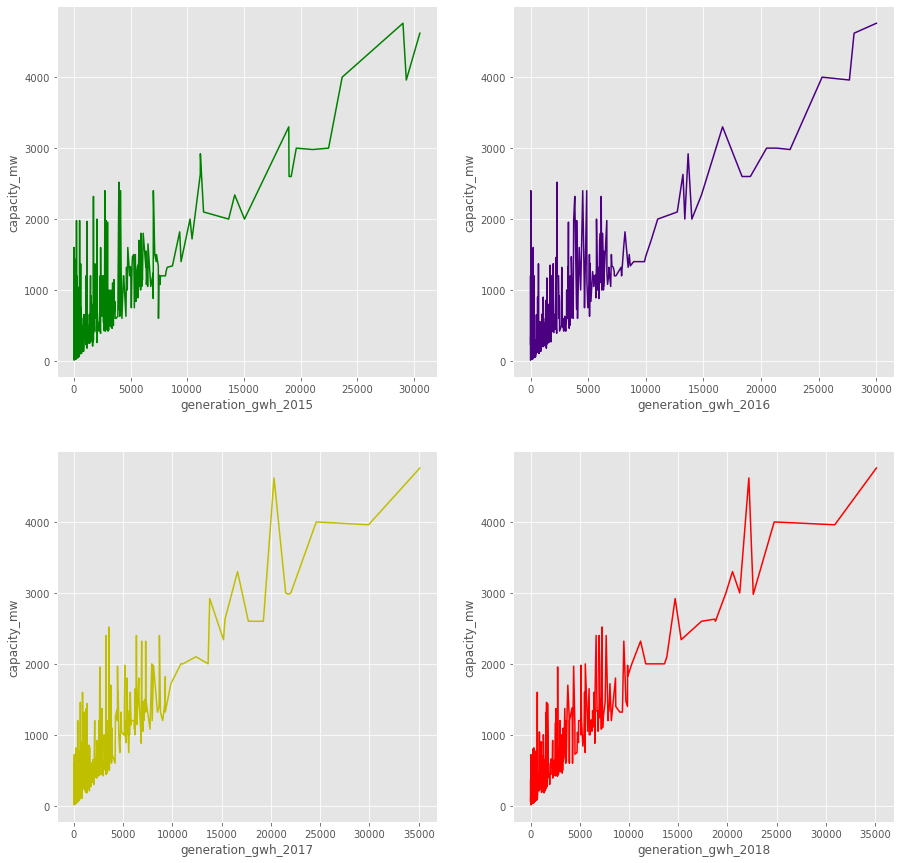

In [36]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

# Checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=data,color="g")

# Checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=data,color="indigo")

# Checking attrition level in Monthlyrate
sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=data,color="y")

# Checking attrition level in Monthlyincome
sns.lineplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=data,color="r")
plt.show()

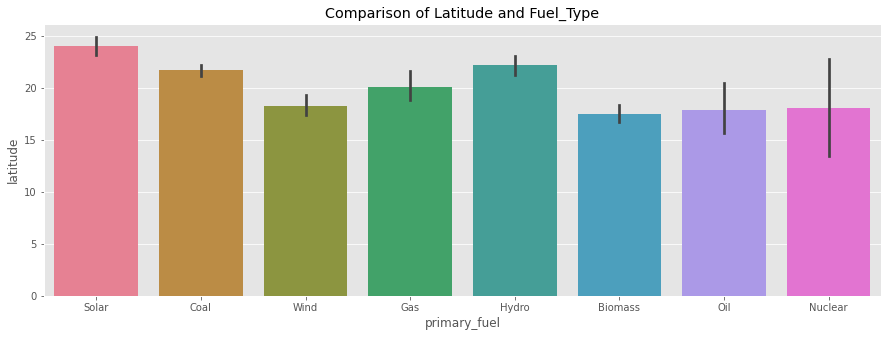

In [37]:
# Relation of fuel type and latitude of the power plant
plt.figure(figsize=[15,5])
plt.title('Comparison of Latitude and Fuel_Type')
sns.barplot(data['primary_fuel'],data["latitude"],palette="husl");

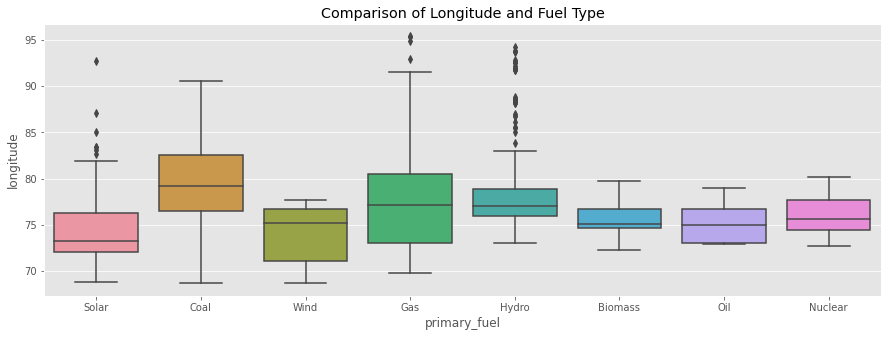

In [38]:
# Relation between fuel type and longitude of the power plant
plt.figure(figsize=[15,5])
plt.style.use('ggplot')
plt.title('Comparison of Longitude and Fuel Type')
sns.boxplot(data['primary_fuel'],data["longitude"]);

# Comparison of the relation between targets

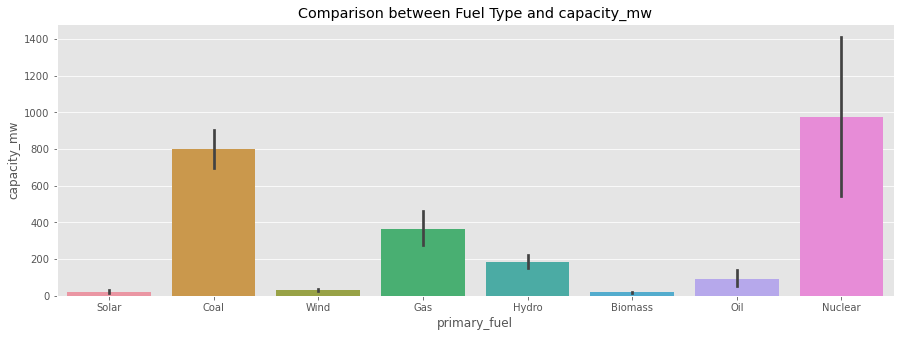

In [39]:
#relation between Fuel Type and capacity_mw
plt.figure(figsize = (15,5))
plt.title("Comparison between Fuel Type and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data)
plt.show()

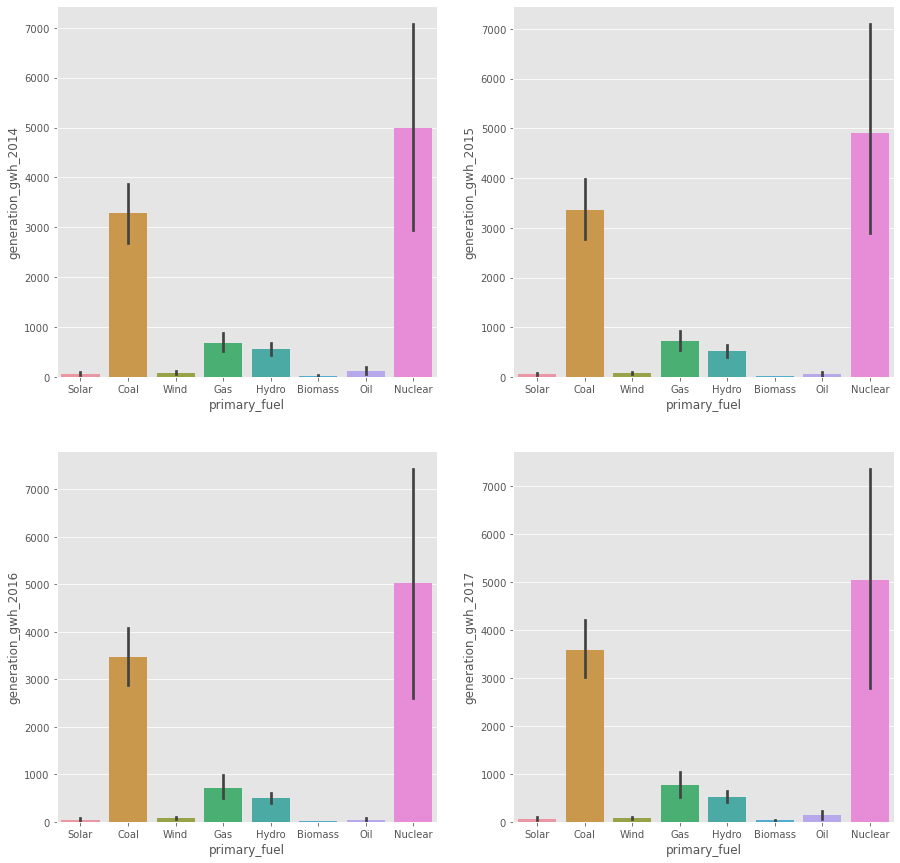

In [40]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

# Checking attrition level in Dailyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=data)

# Checking attrition level in hourlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=data)

# Checking attrition level in Monthlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=data)

# Checking attrition level in Monthlyincome
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=data)
            
plt.show()

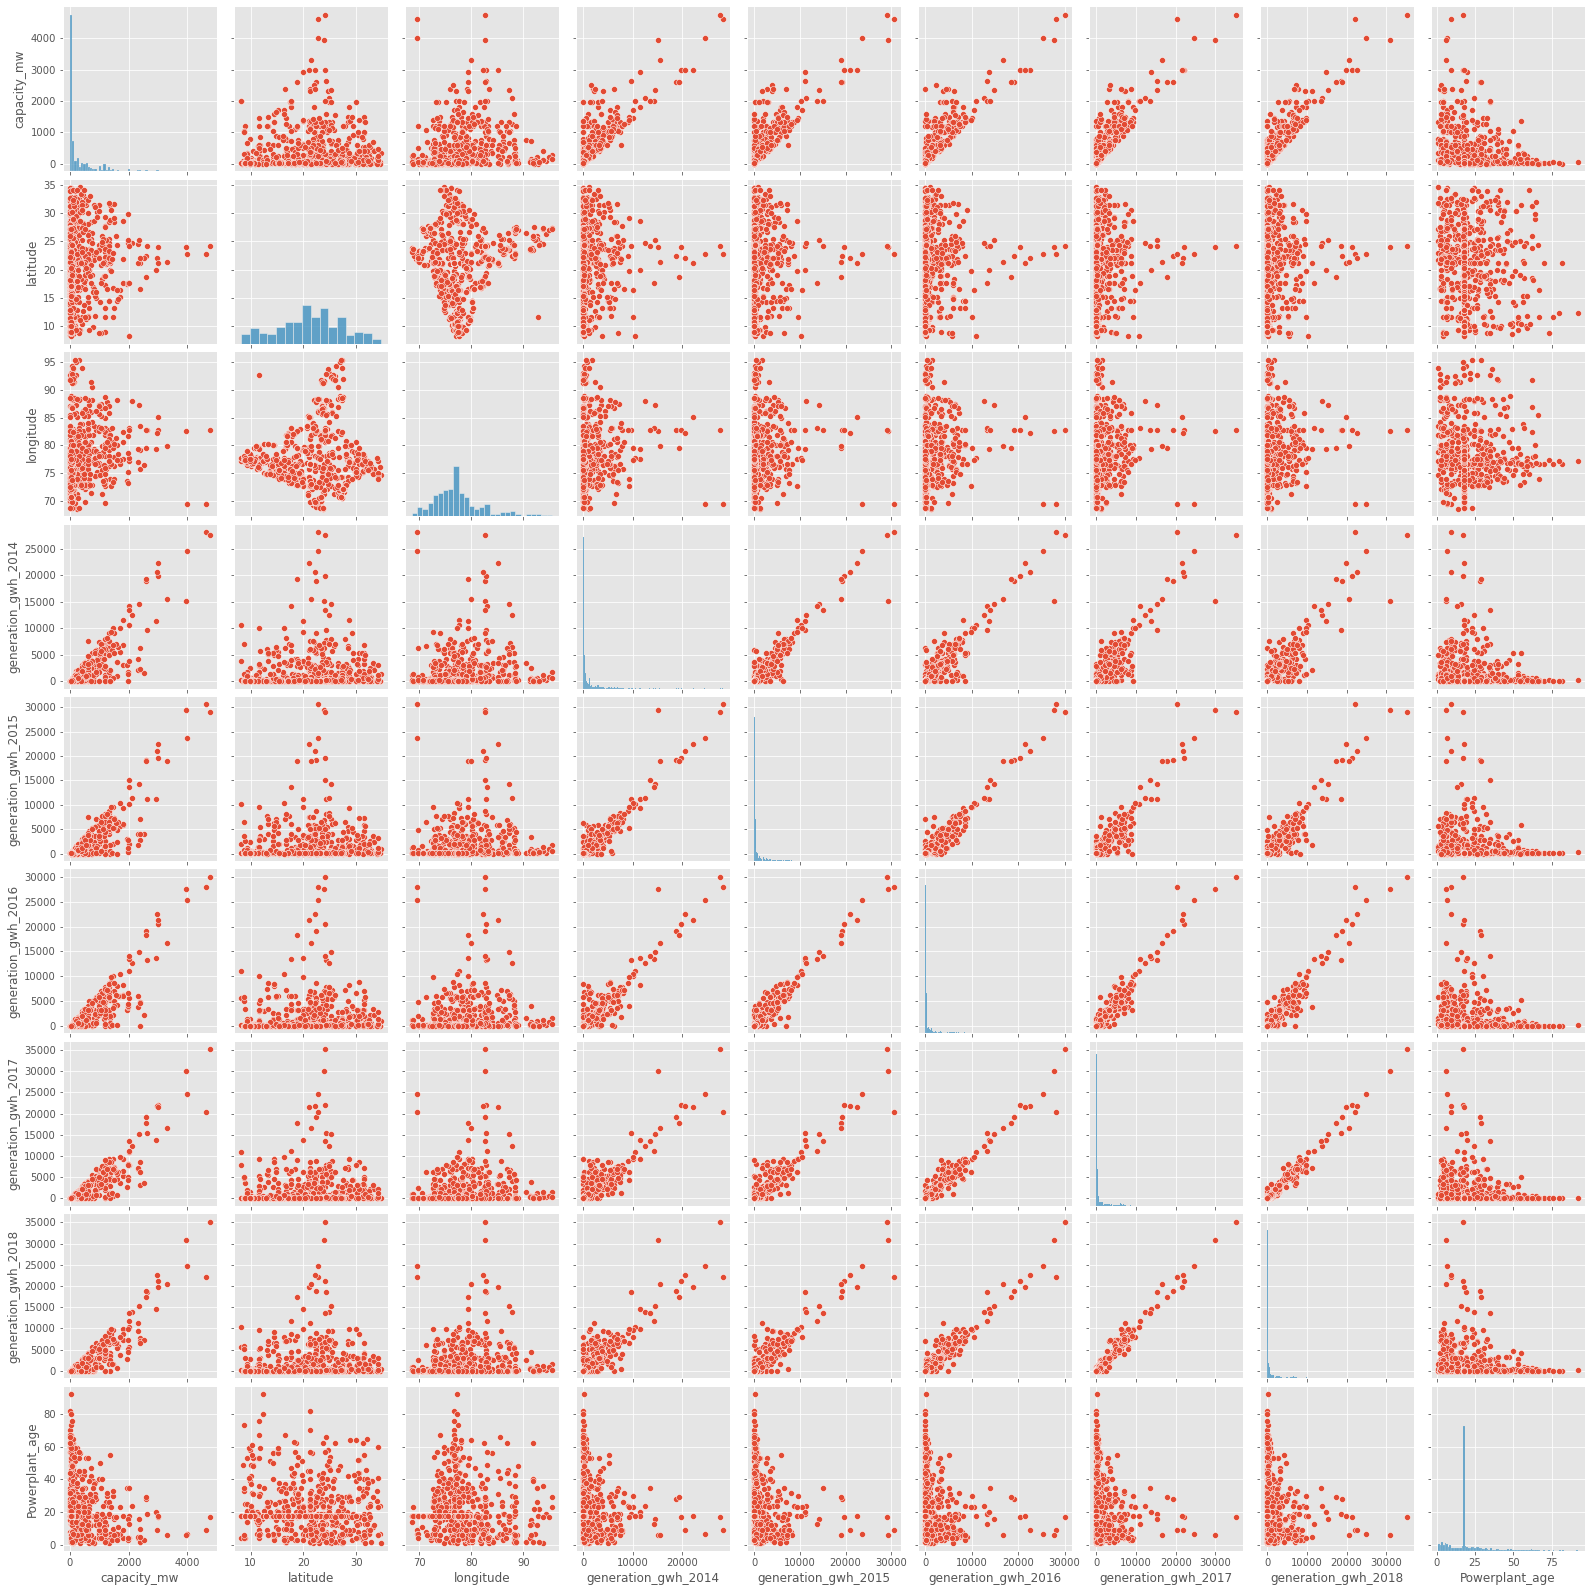

In [41]:
sns.pairplot(data)

from above pairplot , we can say that there are linear relationship between some variables, now need to check multicollinearity to avoid the issues.

# Checking the outliers

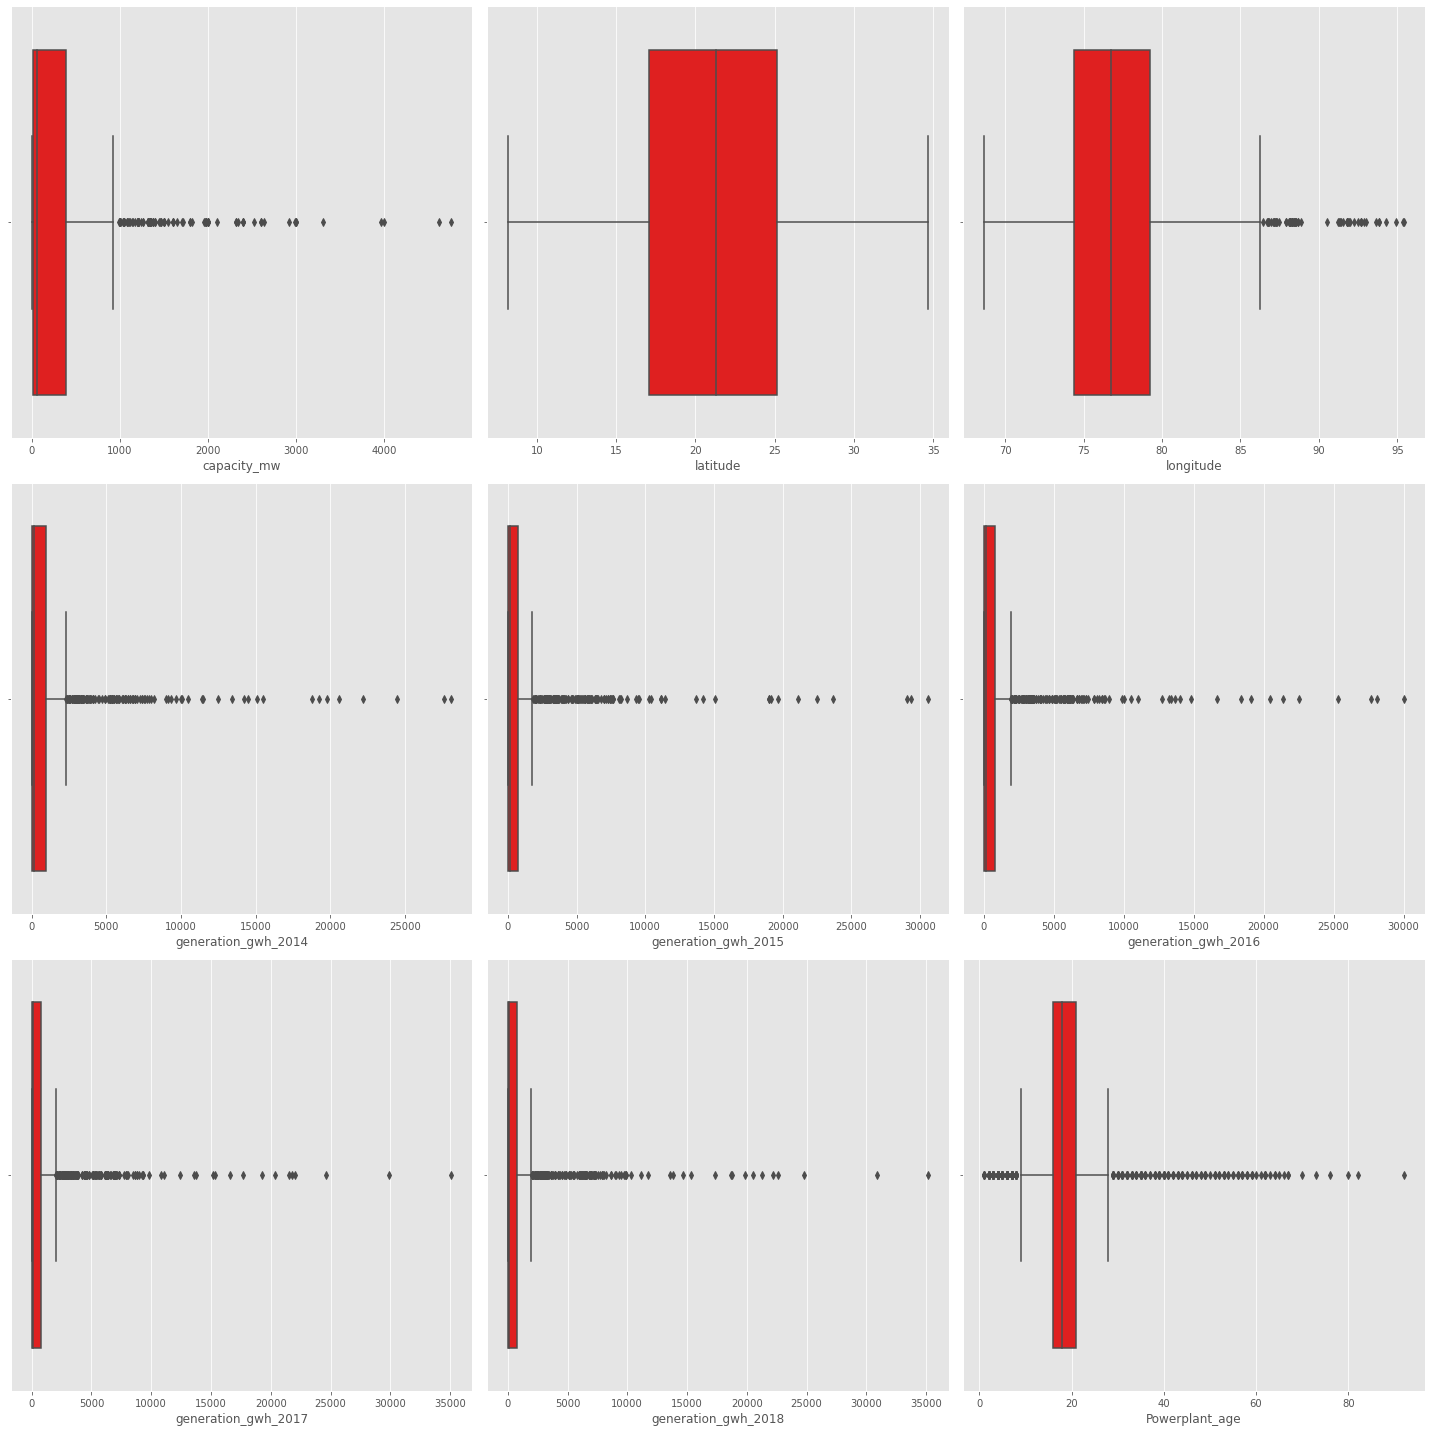

In [42]:
# Checking the outliers available in numerical columns

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

As we can see that all the features having outliers except latitude.

# Removing outliers

In [43]:
features = data[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']]
# Using Zscore to remove outliers
z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,0.869917,0.407783,0.388685,0.394962,0.399239,0.395075,0.933076
1,0.585590,0.303199,0.338753,0.317101,0.340211,0.318779,0.172699
2,1.673567,0.384536,0.356870,0.361220,0.347875,0.349436,0.172699
3,2.895239,0.203542,0.122313,0.115372,0.197893,0.219380,0.400812
4,1.035238,0.618085,1.504758,1.592397,1.284064,1.801917,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.841002,0.392630,0.323355,0.134612,0.201071,1.313265
903,0.153415,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
904,0.383592,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
905,0.764564,0.340967,0.332867,0.328925,0.329901,0.331681,0.172699


In [44]:
# Let us Create a new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


In [45]:
#check % of data loss

new_df.shape

(852, 14)

In [46]:
data.shape

(907, 14)

In [47]:
(907-852)/907*100

6.063947078280044

We have lost 6% data by removing outliers

Now Checking outliers using IQR Method

In [48]:
Q1=features.quantile(0.25)
Q3=features.quantile(0.75)
IQR=Q3 - Q1
new_df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df1.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
5,IND0000003,250.0,23.7689,68.6447,Coal,Oil,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,14.0
7,IND0000005,192.0,32.2258,77.2070,Hydro,Oil,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850,9.0
8,IND0000006,290.0,16.3300,75.8863,Hydro,Oil,Central Electricity Authority,WRI,480.594950,144.434200,402.029750,439.372100,406.377900,15.0


In [49]:
new_df1.shape

(508, 14)

In [50]:
(907-508)/907*100

43.991179713340685

We have lost almost 44% data by removing outliers using IQR method. It is not acceptable so we will go ahead with Zscore method with new_df dataframe. 

# Encoding the categorical columns

In [51]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,108,1
1,1,2,173,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,76,0
904,7,2,21,2
905,1,2,59,2


In [52]:
# Checking the skewness
new_df.skew()

capacity_mw             2.178028
latitude               -0.114376
longitude               0.944500
primary_fuel            0.418465
other_fuel1           -19.820871
source                  1.744999
geolocation_source     -2.068499
generation_gwh_2014     2.562088
generation_gwh_2015     2.519395
generation_gwh_2016     2.504234
generation_gwh_2017     2.430029
generation_gwh_2018     2.502936
Powerplant_age          1.278164
dtype: float64

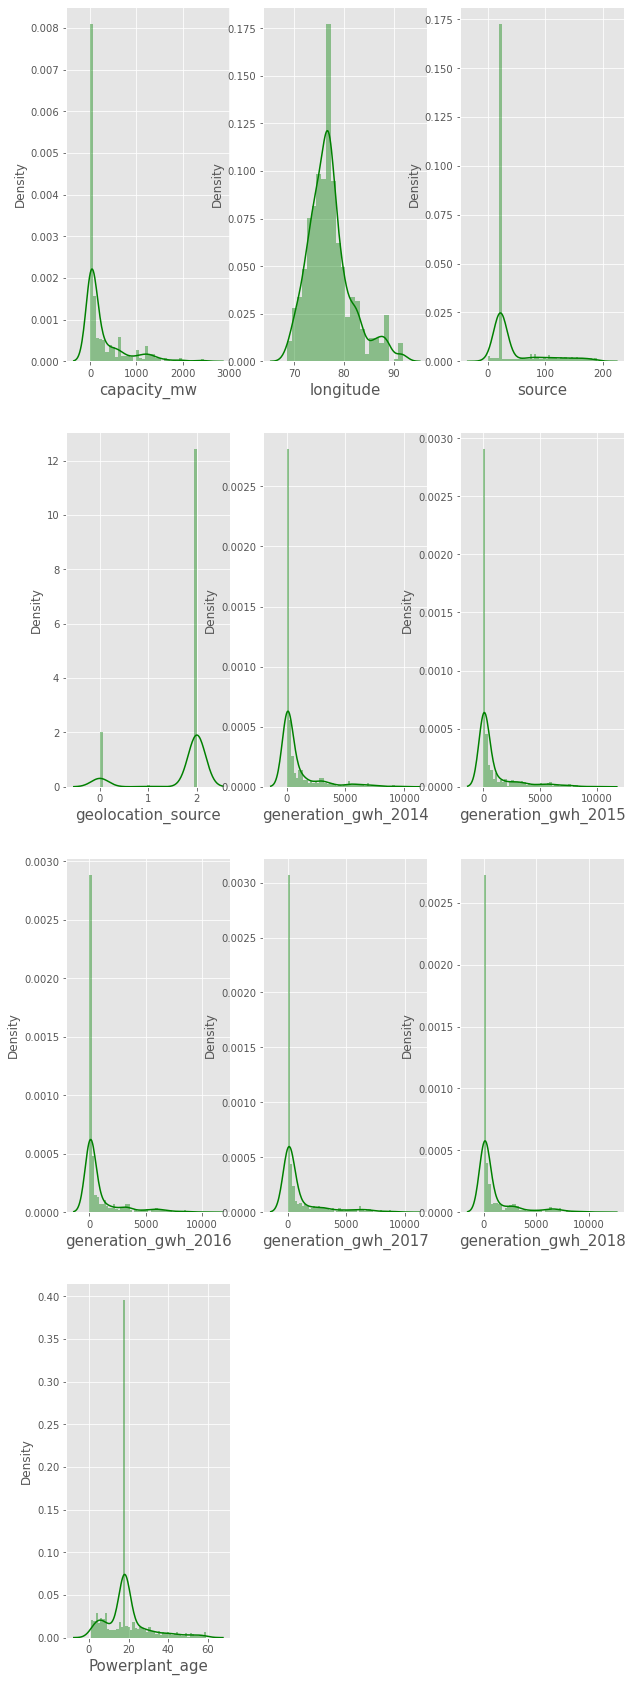

In [53]:

feat=new_df[["capacity_mw",'longitude','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']]
#Relationship Visualizing

plt.figure(figsize = (10,30))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

Data is highly skewed

In [54]:
sk_features=["capacity_mw",'longitude','other_fuel1','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']
scaler = PowerTransformer(method='yeo-johnson')
new_df[sk_features] = scaler.fit_transform(new_df[sk_features].values)
new_df[sk_features].head()

,capacity_mw,longitude,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,0.059444,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,0.059444,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,0.059444,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,0.059444,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,0.059444,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


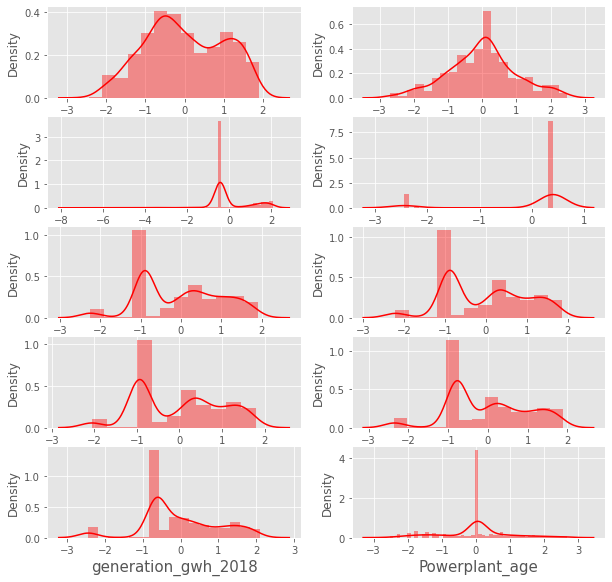

In [55]:
plt.figure(figsize = (10,30))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(15,2,plotnumber)
        sns.distplot(new_df[column], color = 'r')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

In [56]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.057972,0.342446,-0.529581,-0.044733,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
latitude,0.057972,1.000000,-0.069975,-0.000886,0.033249,0.060840,-0.207337,0.127853,0.121847,0.152363,0.140021,0.151176,-0.108286
longitude,0.342446,-0.069975,1.000000,-0.413280,0.039861,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
primary_fuel,-0.529581,-0.000886,-0.413280,1.000000,-0.010352,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
other_fuel1,-0.044733,0.033249,0.039861,-0.010352,1.000000,0.024926,-0.024299,0.004380,0.035902,0.058949,0.022587,0.077934,-0.071462
source,-0.334412,0.060840,-0.198453,0.006314,0.024926,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,-0.207337,0.303271,-0.481369,-0.024299,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.127853,0.267497,-0.376449,0.004380,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.121847,0.247803,-0.371171,0.035902,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.152363,0.297372,-0.398699,0.058949,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588


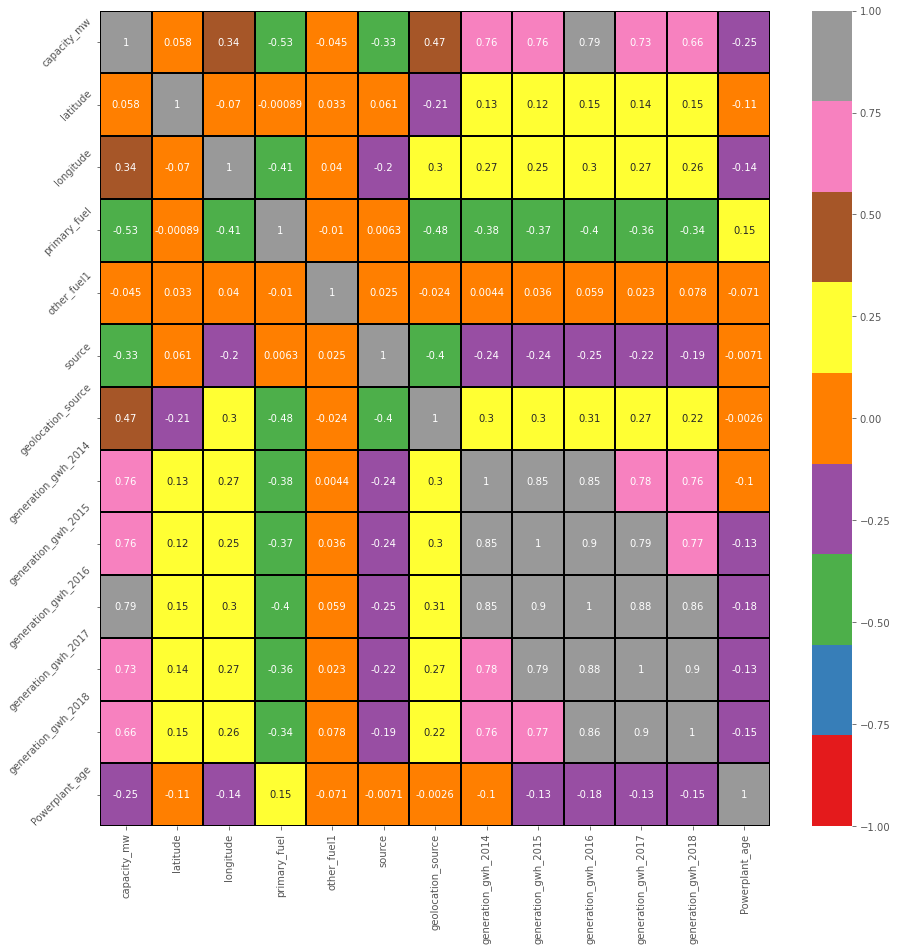

In [57]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(15,15))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="Set1")
plt.yticks(rotation=45);

Observations:

1.The label capacity_mw is highly positive correlated with the features generation_gwh_2017, generation_gwh_2016,
2.generation_gwh_2015, generation_gwh_2014, generation_gwh_2018. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
3.The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

In [58]:
#Let us save one Data Frame for regression problem
Classif_data=new_df

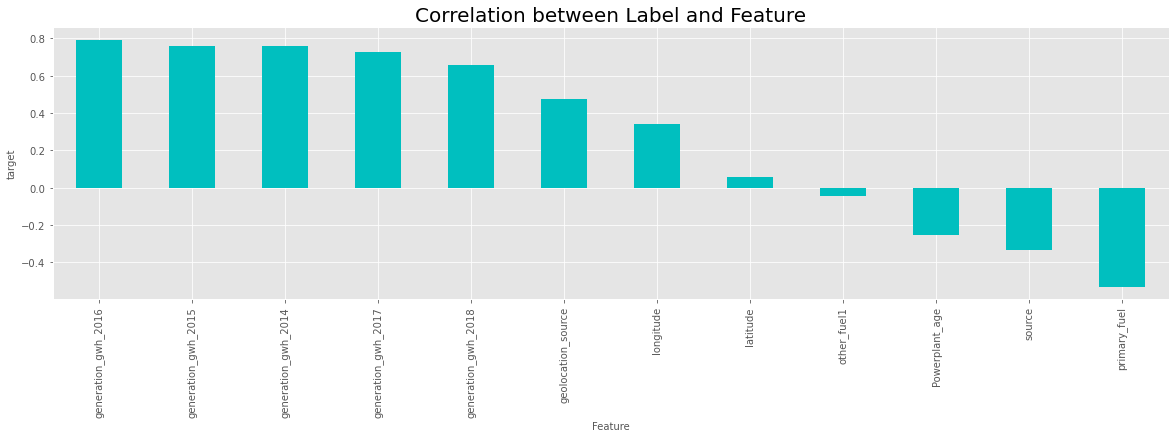

In [59]:
#correlation between label and feature
plt.figure(figsize=(20,5))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Label and Feature',fontsize=20)
plt.show()

Relation between label and other_fuel1 ,latitude is not much relevant so we can drop them as well

In [60]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)
new_df.drop('gppd_idnr',axis=1,inplace=True)

In [61]:
new_df

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...,...,...,...
902,1.668461,0.231036,1,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
903,-1.598358,0.420781,6,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
904,-0.508660,-0.225422,7,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
905,0.109050,-0.761662,1,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [62]:
#seperating Label and Features
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']
x.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [63]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,1.177615,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,-0.972680,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,1.607673,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,-0.542621,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,-0.972680,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...,...,...
847,0.231036,-0.972680,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,0.420781,1.177615,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.225422,1.607673,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,-0.761662,-0.972680,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [64]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.297178,longitude
1,1.739390,primary_fuel
2,1.361687,source
3,1.662795,geolocation_source
4,4.224308,generation_gwh_2014
5,6.426827,generation_gwh_2015
6,10.785110,generation_gwh_2016
7,7.294450,generation_gwh_2017
8,6.220114,generation_gwh_2018
9,1.078297,Powerplant_age


In [65]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9319001553818214  on Random_state  129


In [66]:
#Creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [67]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.9323212948116908
MAE: 0.1952363351589821
MSE: 0.0770620488249866
RMSE: 0.2776005202174279
0.8904703367879302


In [68]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',mean_absolute_error(y_test, predDTR))
print('MSE:',mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predDTR)))
# Checking cv score 
print(cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.8728299450772169
MAE: 0.25598922477426894
MSE: 0.14480160272375575
RMSE: 0.3805280577352421
0.8004336678962973


In [69]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.9275160833480539
MAE: 0.2157613982098984
MSE: 0.08253348093047451
RMSE: 0.28728640923384197
0.9008097447248481


In [70]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
cr=cross_val_score(BR,x,y,cv=5).mean()
print(cross_val_score(BR,x,y,cv=5).mean())

R2_Score: 0.9247518155565361
MAE: 0.20727802204753484
MSE: 0.08568100183712579
RMSE: 0.29271317332352126
0.8823948284655325


As per above analysis, we can say that GradientBoosting Regressor is our best fitting model. Let's increse the accuracy of the model by using hyper parameter tuning

In [71]:
parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
          
          }
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [72]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [73]:
capacity_model = GradientBoostingRegressor(criterion='squared_error', learning_rate= 0.1, loss= 'squared_error',max_features= 'sqrt')
capacity_model.fit(x_train, y_train)
pred = capacity_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.2776005202174279
R2_Score: 92.63786230139507


Model accuracy is 92.7%

In [74]:
# Saving the model using .pkl

joblib.dump(capacity_model,"Global_Power_Plant.pkl")

['Global_Power_Plant.pkl']

In [75]:
# Loading the saved model
model=joblib.load("Global_Power_Plant.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,-0.396120,-0.281305
1,-0.458110,-0.327444
2,-0.948842,-1.040760
3,0.165116,0.272256
4,1.523747,1.287494
...,...,...
251,0.860692,1.001826
252,1.698815,1.296043
253,1.377918,0.921657
254,1.593827,1.367227


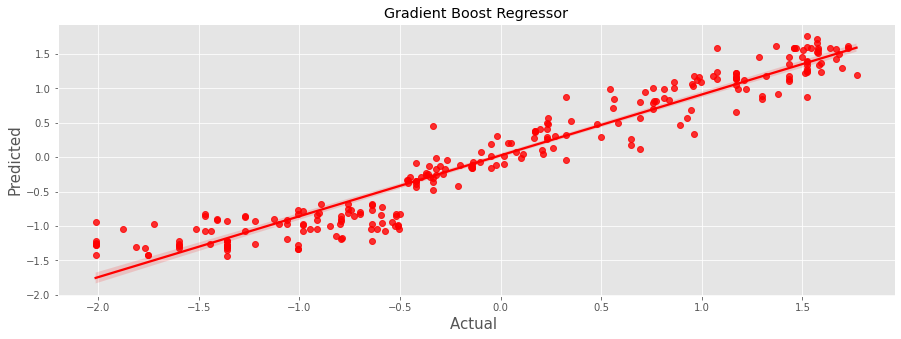

In [76]:
plt.figure(figsize=(15,5))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Regressor")
plt.show()

# MODEL 2 : capacity_mw is target variable . Let us Do the Classification
We have already saved our data set after removing skewness

In [77]:
Classif_data.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [93]:
#let us rename 'primary_fuel' to Fuel_Type
Classif_data.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [95]:
#now let us plot correlation and heatmap so that we can move forward
Classif_data.corr()


,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.342446,-0.529581,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
longitude,0.342446,1.000000,-0.413280,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
Fuel_Type,-0.529581,-0.413280,1.000000,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
source,-0.334412,-0.198453,0.006314,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,0.303271,-0.481369,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.267497,-0.376449,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.247803,-0.371171,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.297372,-0.398699,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588
generation_gwh_2017,0.725192,0.273371,-0.356194,-0.224322,0.266767,0.776621,0.793076,0.884353,1.000000,0.904954,-0.131981
generation_gwh_2018,0.658112,0.260847,-0.336625,-0.190145,0.223006,0.755111,0.774797,0.862621,0.904954,1.000000,-0.147871


<AxesSubplot:>

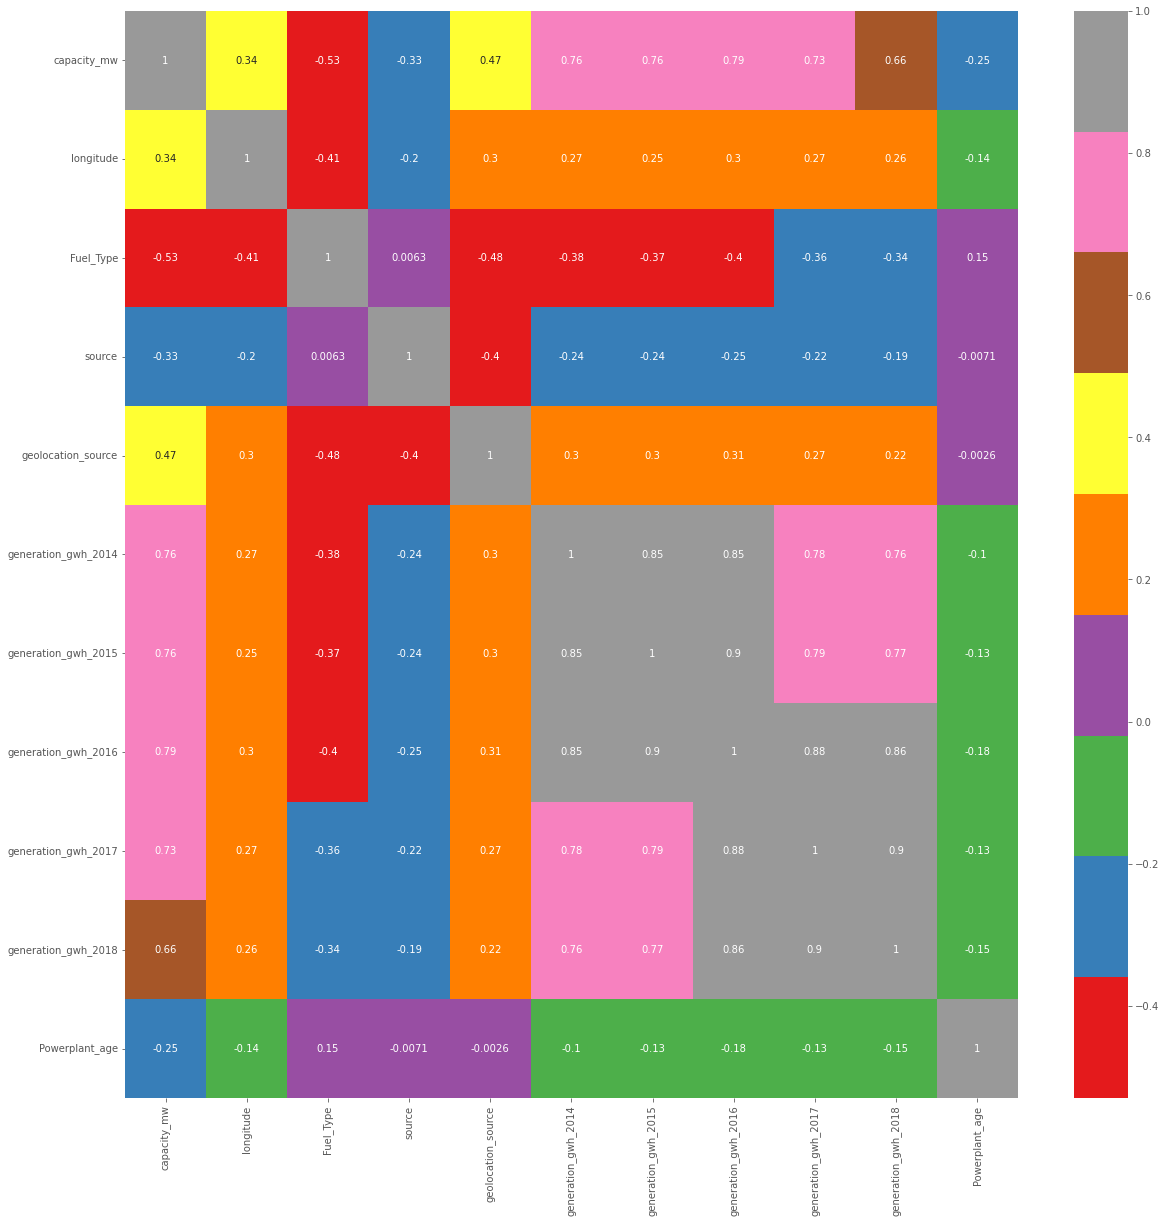

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(Classif_data.corr(), annot = True, linecolor="c",cmap="Set1")

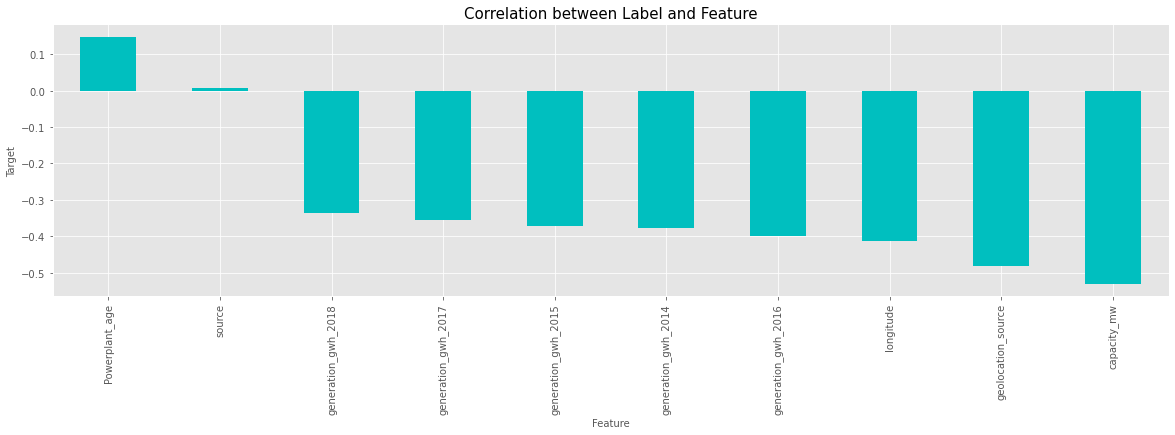

In [97]:
plt.figure(figsize=(20,5))
Classif_data.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('Correlation between Label and Feature',fontsize=15)
plt.show()

In [98]:
Classif_data.drop(columns=['source','longitude'],axis=1,inplace=True)
Classif_data.head()

,capacity_mw,Fuel_Type,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,6,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,1,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,7,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [99]:
#Seperating Label and Features columns
#features
cl_x=Classif_data.drop("Fuel_Type",axis=1) 

#Label
cl_y=Classif_data['Fuel_Type'] 

In [100]:
scaler = StandardScaler()
cl_x= pd.DataFrame(scaler.fit_transform(cl_x), columns=cl_x.columns)
cl_x

,capacity_mw,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...
847,1.668461,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,-1.598358,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.508660,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,0.109050,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [101]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(cl_x.values,i)
              for i in range(len(cl_x.columns))]
vif["Features"] = cl_x.columns

# Let's check the values
vif

,VIF values,Features
0,3.814449,capacity_mw
1,1.350136,geolocation_source
2,4.444195,generation_gwh_2014
3,6.465385,generation_gwh_2015
4,11.077630,generation_gwh_2016
5,7.530329,generation_gwh_2017
6,6.381029,generation_gwh_2018
7,1.139573,Powerplant_age


In [102]:
# let us check the label- equaly ditributed or not
cl_y.value_counts()

1    240
3    220
6    126
7    123
2     65
0     50
5     20
4      8
Name: Fuel_Type, dtype: int64

Label is not equally distributed so need to use sampling technique( SMOTE) to make it balanced.

In [103]:
#Oversampling the data
SM = SMOTE()
cl_x, cl_y = SM.fit_resample(cl_x,cl_y)
cl_y.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: Fuel_Type, dtype: int64

# Model Building

In [104]:
maxAccu=0
maxRS=0
for i in range(1,200):
    clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(clx_train, cly_train)
    pred = DTC.predict(clx_test)
    acc=accuracy_score(cly_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8145833333333333  on Random_state  41


In [105]:
clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.30, random_state =maxRS)

In [106]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(clx_train,cly_train)

#Prediction
pred = DTC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred))
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,cl_x,cl_y,cv=5).mean())

0.8090277777777778
[[53  1  0  0  0  2  0  5]
 [ 4 32  5  7  8  0  0  3]
 [ 2  6 54  9  1  0  0  3]
 [ 0  7  4 59  2  0  2  1]
 [ 0  2  0  0 81  0  0  0]
 [ 1  0  3  0  0 71  0  2]
 [ 0  0  0  2  0  0 74  0]
 [17  7  1  0  0  3  0 42]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        61
           1       0.58      0.54      0.56        59
           2       0.81      0.72      0.76        75
           3       0.77      0.79      0.78        75
           4       0.88      0.98      0.93        83
           5       0.93      0.92      0.93        77
           6       0.97      0.97      0.97        76
           7       0.75      0.60      0.67        70

    accuracy                           0.81       576
   macro avg       0.80      0.80      0.80       576
weighted avg       0.81      0.81      0.81       576

0.7708333333333333


In [107]:
RFC = RandomForestClassifier()
RFC.fit(clx_train,cly_train)

#Prediction
pred = RFC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(RFC,cl_x,cl_y,cv=5).mean()*100)

82.29166666666666
[[52  2  0  0  0  2  0  5]
 [ 2 35  8  6  6  0  0  2]
 [ 2  7 60  3  1  1  0  1]
 [ 0  7  6 60  0  0  0  2]
 [ 0  1  0  1 81  0  0  0]
 [ 3  1  0  0  0 68  0  5]
 [ 0  0  0  2  0  0 74  0]
 [16  7  1  0  0  2  0 44]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        61
           1       0.58      0.59      0.59        59
           2       0.80      0.80      0.80        75
           3       0.83      0.80      0.82        75
           4       0.92      0.98      0.95        83
           5       0.93      0.88      0.91        77
           6       1.00      0.97      0.99        76
           7       0.75      0.63      0.68        70

    accuracy                           0.82       576
   macro avg       0.81      0.81      0.81       576
weighted avg       0.83      0.82      0.82       576

Corross Validation Score 81.19791666666666


In [108]:
SVM = SVC()
SVM.fit(clx_train,cly_train)

#Prediction
pred = SVM.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(SVM,cl_x,cl_y,cv=5).mean()*100)

64.23611111111111
[[58  0  0  0  0  0  0  3]
 [ 4 23  7  1 14  0  0 10]
 [ 3  9 42  0  5  2  0 14]
 [ 8 15  9 32  3  0  0  8]
 [ 0 14  0  2 67  0  0  0]
 [19  0  0  0  0 46  0 12]
 [ 1  2  0  0  0  0 73  0]
 [39  0  2  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.44      0.95      0.60        61
           1       0.37      0.39      0.38        59
           2       0.70      0.56      0.62        75
           3       0.91      0.43      0.58        75
           4       0.75      0.81      0.78        83
           5       0.96      0.60      0.74        77
           6       1.00      0.96      0.98        76
           7       0.38      0.41      0.40        70

    accuracy                           0.64       576
   macro avg       0.69      0.64      0.63       576
weighted avg       0.71      0.64      0.65       576

Corross Validation Score 66.66666666666667


In [109]:
knn = KNN()
knn.fit(clx_train,cly_train)

#Prediction
pred = knn.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(knn,cl_x,cl_y,cv=5).mean()*100)

76.21527777777779
[[49  2  0  0  0  0  0 10]
 [ 3 24 14  6  9  1  0  2]
 [ 1  8 51  4  2  4  0  5]
 [ 1 10  5 50  0  2  0  7]
 [ 0  0  1  1 81  0  0  0]
 [ 4  1  0  0  0 68  0  4]
 [ 0  1  0  2  0  0 73  0]
 [15  4  6  0  0  2  0 43]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        61
           1       0.48      0.41      0.44        59
           2       0.66      0.68      0.67        75
           3       0.79      0.67      0.72        75
           4       0.88      0.98      0.93        83
           5       0.88      0.88      0.88        77
           6       1.00      0.96      0.98        76
           7       0.61      0.61      0.61        70

    accuracy                           0.76       576
   macro avg       0.75      0.75      0.75       576
weighted avg       0.76      0.76      0.76       576

Corross Validation Score 76.66666666666667


In [110]:
BC= BaggingClassifier()
BC.fit(clx_train,cly_train)

#Prediction
pred = BC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(BC,cl_x,cl_y,cv=5).mean()*100)

81.07638888888889
[[48  1  0  0  0  1  0 11]
 [ 1 34  8  6  7  0  0  3]
 [ 1  3 64  3  1  1  0  2]
 [ 0 10 10 52  1  0  0  2]
 [ 0  0  1  0 82  0  0  0]
 [ 7  0  0  0  0 68  0  2]
 [ 0  0  0  2  0  0 74  0]
 [15  7  2  0  0  1  0 45]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        61
           1       0.62      0.58      0.60        59
           2       0.75      0.85      0.80        75
           3       0.83      0.69      0.75        75
           4       0.90      0.99      0.94        83
           5       0.96      0.88      0.92        77
           6       1.00      0.97      0.99        76
           7       0.69      0.64      0.67        70

    accuracy                           0.81       576
   macro avg       0.80      0.80      0.80       576
weighted avg       0.81      0.81      0.81       576

Corross Validation Score 78.64583333333333


In [111]:
GBC = GradientBoostingClassifier()
GBC.fit(clx_train,cly_train)

#Prediction
pred = GBC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(GBC,cl_x,cl_y,cv=5).mean()*100)

79.34027777777779
[[52  0  0  0  0  0  0  9]
 [ 2 29  6  5  8  2  1  6]
 [ 1  6 54  6  1  2  0  5]
 [ 0 10  5 58  1  0  0  1]
 [ 0  2  0  2 78  1  0  0]
 [ 3  0  0  0  0 70  0  4]
 [ 0  0  0  3  0  0 73  0]
 [19  6  1  0  0  1  0 43]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.75        61
           1       0.55      0.49      0.52        59
           2       0.82      0.72      0.77        75
           3       0.78      0.77      0.78        75
           4       0.89      0.94      0.91        83
           5       0.92      0.91      0.92        77
           6       0.99      0.96      0.97        76
           7       0.63      0.61      0.62        70

    accuracy                           0.79       576
   macro avg       0.78      0.78      0.78       576
weighted avg       0.79      0.79      0.79       576

Corross Validation Score 80.05208333333333


In [112]:
#Hyper Parameter Tuning
parameters={'loss' : ['log_loss', 'deviance', 'exponential'],
           'n_estimators':[1,20,50,100],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
           }
GVC=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10)

In [113]:
GVC.fit(clx_train,cly_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [1, 20, 50, 100]})

In [114]:
GVC.best_params_

{'criterion': 'mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'n_estimators': 100}

In [115]:
Fuel_Model = GradientBoostingClassifier(**GVC.best_params_)  #fitted again
Fuel_Model.fit(clx_train,cly_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.2)

In [116]:
Classifier = Fuel_Model.fit(clx_train, cly_train)
pred = Fuel_Model.predict(clx_test)
acc=accuracy_score(cly_test,pred)
print("Accuracy Score",acc*100)

Accuracy Score 80.38194444444444


In [117]:
# Saving the model using .pkl

import joblib
joblib.dump(Fuel_Model,"Global_Power_Plant_Fuel.pkl")

['Global_Power_Plant_Fuel.pkl']

In [118]:
# Loading the saved model
model=joblib.load("Global_Power_Plant_Fuel.pkl")

#Prediction
prediction = model.predict(clx_test)
prediction

array([4, 7, 7, 5, 0, 5, 7, 5, 5, 7, 7, 2, 3, 0, 3, 3, 2, 4, 1, 5, 0, 5,
       6, 7, 3, 0, 2, 5, 4, 0, 2, 2, 2, 2, 4, 6, 7, 2, 5, 4, 0, 2, 4, 0,
       7, 7, 4, 5, 2, 1, 6, 5, 0, 2, 6, 5, 6, 1, 1, 5, 4, 5, 3, 5, 6, 5,
       2, 5, 0, 3, 3, 4, 2, 6, 0, 2, 4, 0, 3, 5, 7, 1, 6, 2, 4, 3, 5, 7,
       6, 3, 4, 7, 6, 7, 7, 3, 0, 7, 7, 4, 1, 1, 0, 5, 1, 2, 3, 4, 6, 1,
       7, 2, 0, 4, 4, 2, 6, 4, 5, 5, 6, 3, 1, 2, 3, 7, 0, 4, 0, 4, 1, 7,
       3, 2, 4, 3, 5, 4, 4, 3, 7, 4, 4, 5, 7, 6, 3, 3, 6, 0, 6, 2, 4, 5,
       4, 1, 4, 0, 3, 2, 0, 1, 4, 7, 3, 6, 3, 4, 2, 5, 2, 7, 6, 2, 4, 0,
       4, 0, 2, 3, 6, 6, 2, 4, 0, 3, 3, 4, 4, 2, 7, 5, 0, 6, 3, 0, 3, 0,
       5, 3, 0, 4, 2, 3, 3, 3, 1, 0, 0, 7, 4, 2, 3, 7, 6, 3, 6, 6, 1, 5,
       5, 6, 3, 6, 0, 6, 5, 3, 5, 1, 0, 7, 1, 4, 6, 3, 5, 4, 0, 5, 3, 0,
       6, 4, 3, 6, 6, 7, 4, 7, 4, 1, 6, 2, 0, 5, 4, 4, 1, 4, 5, 2, 4, 5,
       0, 5, 2, 2, 5, 3, 6, 4, 4, 2, 3, 4, 7, 3, 7, 5, 4, 5, 6, 3, 3, 6,
       3, 6, 5, 1, 1, 3, 6, 2, 5, 1, 5, 4, 5, 7, 7,

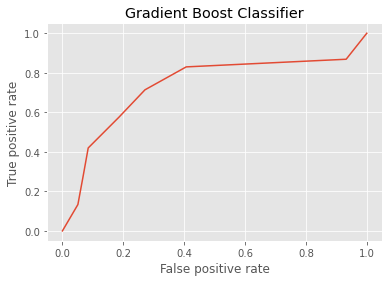

In [119]:
#ROC- AUC curve
tpr,fpr,thresholds = roc_curve(cly_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'Gradient Boost Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boost Classifier')
plt.show()

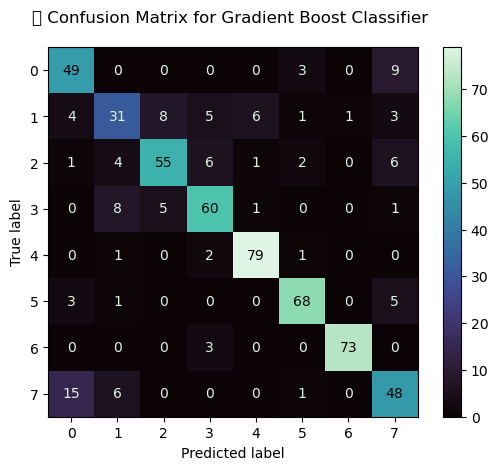

In [120]:
#Confusion Matrix
plt.style.use('default')
class_names = Classif_data.columns
metrics.plot_confusion_matrix(Classifier, clx_test, cly_test, cmap='mako')
plt.title('\t Confusion Matrix for Gradient Boost Classifier \n')
plt.show()

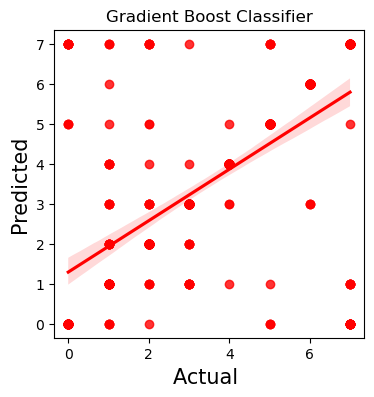

In [122]:
#Plotting for prediction
plt.figure(figsize=(4,4))
sns.regplot(cly_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Classifier")
plt.show()